C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_18936\2343260268.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_18936\2343260268.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)
C:\Users\meisamasgri\AppData\Local\Temp\ipykernel_18936\2343260268.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.dropna(inplace=True)
C:\U

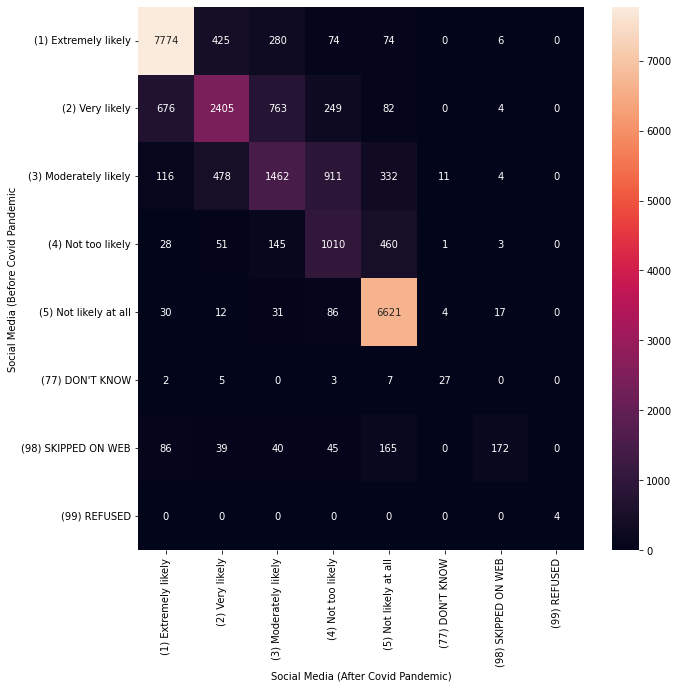

In [1]:
#IMPORTING DATASET(.CSV) INTO PANDAS DATAFRAME
import alt as alt
import pandas as pd

dataset1 = pd.read_csv('01_april_30_covid_impact_survey.csv',
                       sep=',',
                       index_col=False,
                       dtype='unicode')
dataset1.columns = map(str.upper, dataset1.columns)

dataset2 = pd.read_csv('02_May_12_covid_impact_survey.csv',
                       sep=',',
                       index_col=False,
                       dtype='unicode')

dataset3 = pd.read_csv('03_june_9_covid_impact_survey.csv',
                       sep=',',
                       index_col=False,
                       dtype='unicode')
dataset3.columns = map(str.upper, dataset3.columns)

#Selected Features
selected_features = ['SOC1','SOC2A','SOC2B','SOC3A','SOC3B','SOC4A','SOC4B',
                      'SOC5A','SOC5B','SOC5C','SOC5D','SOC5E',
                      'PHYS1A','PHYS1B','PHYS1C','PHYS1D','PHYS1E','PHYS1F','PHYS1G','PHYS1H','PHYS1I','PHYS1J','PHYS1K','PHYS1L','PHYS1M','PHYS1N','PHYS1O','PHYS1P','PHYS1Q',
                      'PHYS2_1','PHYS2_2','PHYS2_3','PHYS2_4','PHYS2_5','PHYS2_6','PHYS2_7','PHYS2_8','PHYS2_9','PHYS2_10','PHYS2_11','PHYS2_12','PHYS2_13','PHYS2_14','PHYS2_15','PHYS2_16','PHYS2_17','PHYS2_18','PHYS2_19',
                      'PHYS7_1','PHYS7_2','PHYS7_3','PHYS7_4',
                      'PHYS8',
                      'PHYS10A','PHYS10B','PHYS10C','PHYS10D','PHYS10E',
                      'AGE7','GENDER','RACETH','ECON4A','ECON4B','ECON3','HHINCOME','EDUCATION','HHSIZE1','HH_BANNER',
                      ]


df1 = dataset1[selected_features]
df1.dropna(inplace=True)
df2 = dataset2[selected_features]
df2.dropna(inplace=True)
df3 = dataset3[selected_features]
df3.dropna(inplace=True)

df = df1.append(df2,ignore_index = True).append(df3,ignore_index = True)
# df.isna().sum()

#Exporting Selected Features from datasets
from pathlib import Path

filepath1 = Path('C:\python\df1.csv')
filepath1.parent.mkdir(parents=True, exist_ok=True)
df1.to_csv(filepath1)

filepath2 = Path('C:\python\df2.csv')
filepath2.parent.mkdir(parents=True, exist_ok=True)
df2.to_csv(filepath2)

filepath3 = Path('C:\python\df3.csv')
filepath3.parent.mkdir(parents=True, exist_ok=True)
df3.to_csv(filepath3)

filepath = Path('C:\python\df.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(filepath)

#SE1: Changes in Social Relationships Before(SOC2B) and After(SOC2A) Covid Pandemic
import matplotlib.pyplot as plt
import seaborn as sns
SE1 = pd.crosstab(df['ECON4B'],
                  df['ECON4A'],
                 margins = False)

fig, ax = plt.subplots(figsize=(10, 10))
s= sns.heatmap(SE1, annot=True,fmt='g')
s.set(xlabel='Social Media (After Covid Pandemic)', ylabel='Social Media (Before Covid Pandemic')
plt.savefig("C:\python\SE07-CROSS.png",
            format='png',
            dpi=600,
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

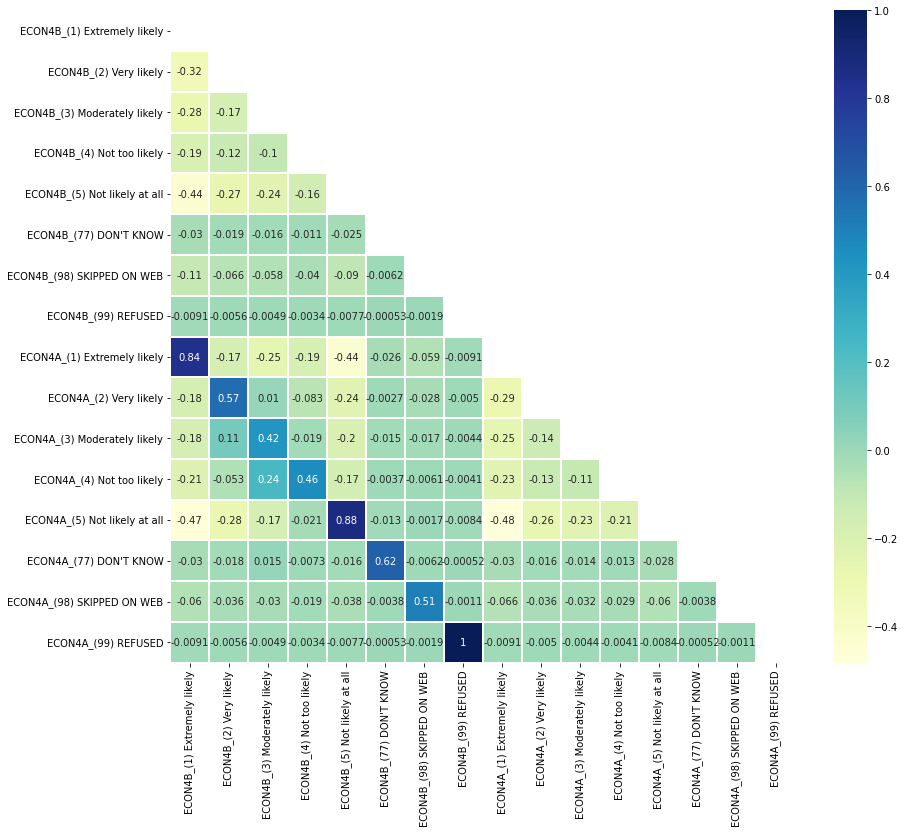

In [2]:
import numpy as np

SE7 = pd.get_dummies(df[['ECON4B','ECON4A']])
plt.figure(figsize=(14,12))
SE7_CORR = SE7.corr()
matrix = np.triu(SE7_CORR)
s=sns.heatmap(SE7_CORR,linewidths=.1,cmap="YlGnBu", annot=True, mask=matrix)
plt.yticks(rotation=0);
plt.savefig("C:\python\SE07-CORR.png",
            format='png',
            dpi=600,
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

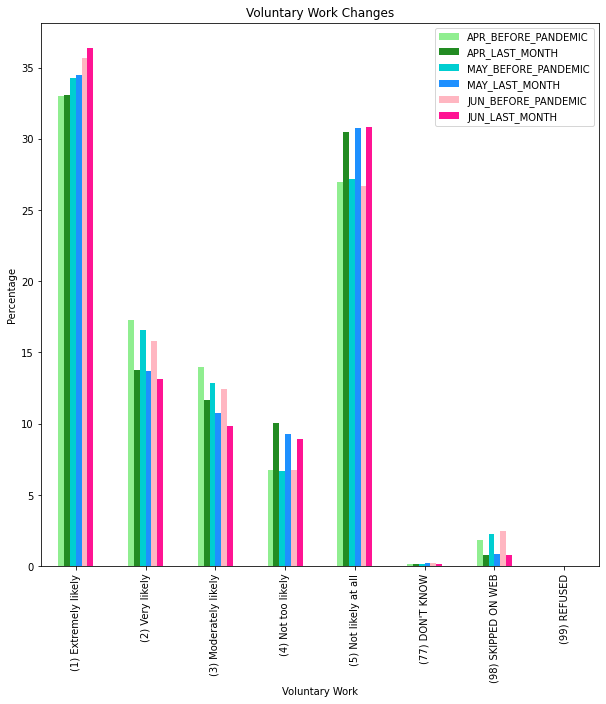

In [3]:
se7_1=df1[['ECON4B','ECON4A']]

se7_apr = df1[['ECON4B','ECON4A']]

data1B=se7_1['ECON4B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='april_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

data1A=se7_1['ECON4A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='april_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

se7_2=df2[['ECON4B','ECON4A']]
data2B=se7_2['ECON4B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='may_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)
data2A=se7_2['ECON4A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='may_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

se7_3=df3[['ECON4B','ECON4A']]
data3B=se7_3['ECON4B'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='june_before')\
    .sort_values('unique_values')\
    .reset_index(drop=True)
data3A=se7_3['ECON4A'].value_counts(normalize=True)\
    .rename_axis('unique_values')\
    .reset_index(name='june_after')\
    .sort_values('unique_values')\
    .reset_index(drop=True)

data1 = pd.concat([data1B,data1A['april_after'],data2B['may_before'],data2A['may_after'],data3B['june_before'],data3A['june_after']], axis = 1)
data1.drop(data1.tail(1).index,inplace=True)
x= data1.iloc[: , 1:]*100
data1 = pd.concat([data1B['unique_values'],x], axis = 1)

plotdata = pd.DataFrame({
 "APR_BEFORE_PANDEMIC":data1['april_before'].values,
    "APR_LAST_MONTH":data1['april_after'].values,
    "MAY_BEFORE_PANDEMIC":data1['may_before'].values,
    "MAY_LAST_MONTH":data1['may_after'].values,
    "JUN_BEFORE_PANDEMIC":data1['june_before'].values,
    "JUN_LAST_MONTH":data1['june_after'].values
    },
    index=data1['unique_values']
)
color_dict = {'APR_BEFORE_PANDEMIC':'#90EE90',
              'APR_LAST_MONTH':'#228B22',
              'MAY_BEFORE_PANDEMIC': '#00CED1',
              'MAY_LAST_MONTH': '#1E90FF',
              'JUN_BEFORE_PANDEMIC': '#FFB6C1',
              'JUN_LAST_MONTH': '#FF1493',
              }
plotdata.plot(kind="bar",figsize=(10,10) , color = color_dict)
plt.title("Voluntary Work Changes")
plt.xlabel("Voluntary Work")
plt.ylabel("Percentage")
# plt.savefig(SE03.png)
plt.savefig("C:\python\SE07-BAR.png",
            format='png',
            dpi=600,
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

40                      7235
0                       7212
50                      1177
(998) SKIPPED ON WEB     961
45                       936
                        ... 
99                         1
19.5                       1
106                        1
98                         1
95                         1
Name: ECON3, Length: 104, dtype: int64